In [1]:
import pandas as pd

In [2]:
messages_set1 = pd.read_csv(r'datasets\SMSSpamCollection',
sep='\t', names=["label", "message"])

In [4]:
print(messages_set1.shape)
messages_set1.head(10)

(5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
messages_set2 = pd.read_csv(r"datasets\spam_ham_dataset.csv")  ##another dataset 
print(messages_set2.shape)
messages_set2.head()

(5171, 4)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
messages_set2 = messages_set2.drop(["Unnamed: 0", "label_num"], axis=1)  # dropping 2 colmns
messages_set2 = messages_set2.rename(columns= {'text' : 'message'})      #renaming text column
messages_set2.head()

,label,message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [10]:
messages = pd.concat([messages_set1, messages_set2])  #merging 2 datsets
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.tail()

,label,message
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...
5170,spam,Subject: important online banking alert\r\ndea...


In [12]:
messages.shape

(10743, 2)

In [13]:
messages = messages.sample(frac=1, replace=True, random_state=10).reset_index(drop=True) #shuffling the rows

messages.tail()

,label,message
10738,ham,Oh thanks a lot..i already bought 2 eggs ..
10739,ham,Subject: re : panenergy 9 / 00\r\ncan you make...
10740,ham,Subject: re : mitchell gas services 2 / 00\r\n...
10741,ham,Subject: double a for 5 / 1 / 01 business\r\nk...
10742,ham,Subject: operations pricing model - hours surv...


In [14]:
messages.head(10)

,label,message
0,ham,Happy new year to u too!
1,ham,"Subject: good answer\r\n"" . . . if my people ,..."
2,ham,Crazy ar he's married. Ü like gd looking guys ...
3,spam,Subject: miracle protein for immune system\r\n...
4,ham,Subject: suemar berryman ; gulf plains plant f...
5,spam,Subject: give me a call and let ' s talk dirty...
6,ham,Lol no. Just trying to make your day a little ...
7,ham,Check wid corect speling i.e. Sarcasm
8,ham,Subject: re : personal information needs to be...
9,ham,Subject: pg & e texoma volumes\r\nin reviewing...


C:\Users\welcome\envs\flas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

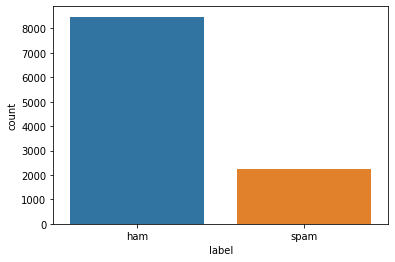

In [15]:
import seaborn as sns

sns.countplot('label', data=messages)

In [16]:
messages['label'].value_counts()

ham     8480
spam    2263
Name: label, dtype: int64

In [17]:
messages.iloc[0]

label                           ham
message    Happy new year to u too!
Name: 0, dtype: object

In [18]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [19]:
#Data cleaning and preprocessing
import re
import nltk


In [20]:
#Data cleaning and preprocessing
import re
import nltk

from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download(['wordnet','stopwords'] )

  
#ps = PorterStemmer()
wordnet=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In corpus we tool the complete column of "message" ., i.e., corpus willbe message column 

In [21]:
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-A]',' ', messages['message'][i])  #removing all numbers except words
    review=review.lower()                                     #lower cases all the letters for convinience
    review=review.split()

    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')] 
    # removing stop words and also lematizing
    review=" ".join(review)
    corpus.append(review)

In [22]:
corpus[:10]

['appy new year u',
 'ubject good answer people called name humble pray seek face turn wicked way hear heaven forgive sin heal land chronicle bryant gumbel recently interviewed billy graham daughter gumbel god stop something billy graham daughter year told god want school want government want finance god perfect gentleman asked need make mind want god want cannot ask disaster strike bryant gumbel silent bob burgess talon consulting inc easy unsubscribe click http topica com u vnf ivhm send email brcc yf unsubscribe topica com email sent dfarmer enron com p c register manage mail http www topica com partner tago register',
 'razy ar married like gd looking guy frens like say korean leona fave dun thk aft thinking mayb prob go',
 'ubject miracle protein immune system antidote kill known deadly virus bacteria body keep disease namely influenza sars cancer hiv etc disease must made dormant stop infection antidote answer www alwond info hp company world developed enhanced product sale check

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#cv = CountVectorizer(max_features=2500)
#X = cv.fit_transform(corpus).toarray()

tv = TfidfVectorizer(max_features=2500)      #defining tfidf vec for transformation
X = tv.fit_transform(corpus).toarray()       #transforming our preprocesssed data to vectors adn array

In [24]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
y=pd.get_dummies(messages['label']) #onehot coding for label column into y variable


In [26]:
y.head()

,ham,spam
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [27]:
y=y.iloc[:,1].values #here we took all the rows of 2nd column "spam" and converted it into an array
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [33]:
# Train Test Split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [34]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [35]:
y_pred=spam_detect_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred, y_test)

0.9581200558399255

In [32]:
confusion_matrix(y_pred, y_test)

array([[2062,   76],
       [  44,  504]], dtype=int64)

In [37]:
for i in range(40):
    print("expected : ", y_test[i], "output : ", y_pred[i])

expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  1 output :  1
expected :  1 output :  1
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  1 output :  1
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  1 output :  1
expected :  0 output :  1
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  1 output :  1
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  1 output :  1
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  

In [38]:
import pickle

pickle.dump(spam_detect_model, open("spam_model.pkl", "wb") )

In [39]:
import pickle

pickle.dump(tv, open("tfidf.pkl", "wb"))